<a href="https://colab.research.google.com/github/rexwotan-A01840088/Ciencia-y-Analitica-de-datos/blob/main/Actividad5Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5053 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: Rex Wotan Dominguez Chang
*   MATRÍCULA: A01840088

En esta actividad trabajarás con el archivo `heart_disease.csv`, basado en un conjunto de datos sobre pacientes y variables clínicas relacionadas con enfermedades cardíacas, disponible en Kaggle.

Los datos fueron recopilados para analizar la presencia de enfermedades cardíacas en los pacientes y contienen información demográfica, clínica y resultados de pruebas diagnósticas. Los indicadores incluidos son:

* `id`: Identificador único de cada paciente
* `age`: Edad del paciente en años
* `origin`: Lugar de estudio
* `sex`: Masculino / Femenino
* `cp`: Tipo de dolor torácico (angina típica, angina atípica, no anginal, asintomático)
* `trestbps`: Presión arterial en reposo (en mm Hg al ingreso al hospital)
* `chol`: Colesterol sérico en mg/dl
* `fbs`: Si el azúcar en ayunas > 120 mg/dl
* `restecg`: Resultados del electrocardiograma en reposo (normal, anomalía ST-T, hipertrofia ventricular izquierda)
* `thalach`: Frecuencia cardíaca máxima alcanzada
* `exang`: Angina inducida por ejercicio (Verdadero / Falso)
* `oldpeak`: Depresión del segmento ST inducida por ejercicio respecto al reposo
* `slope`: Pendiente del segmento ST en el pico de ejercicio
* `ca`: Número de vasos principales coloreados por fluoroscopía (0 - 3)
* `thal`: Resultado de la prueba de perfusión cardíaca (normal, defecto fijo, defecto reversible)
* `num`: Indica si el paciente tiene o no enfermedad cardíaca, o el grado de enfermedad (0 = sano, 1 - 4 = enfermedad) Es la variable de salida o *target*, es decir, la que se pretende predecir más adelante al construir el modelo.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.

In [50]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer

1. Descarga el archivo: `heart_disease.csv` y guarda, en un dataframe (`cardio_df`), todos sus registros.
* Haz que la columna `id` sea el índice del dataframe.
* Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas de texto?
* Determina la cantidad de valores únicos por columna.

In [51]:
import pandas as pd
import numpy as np
from io import StringIO

na_tokens = ['', ' ', 'NA', 'NaN', None]
cardio_df = pd.read_csv('heart_disease.csv', na_values=na_tokens)

cardio_df.columns = [c.strip() for c in cardio_df.columns]

assert 'id' in cardio_df.columns, "No se encontró la columna 'id' en el archivo."
cardio_df = cardio_df.set_index('id').sort_index()

buf = StringIO()
cardio_df.info(buf=buf)
print(buf.getvalue())

num_cols = cardio_df.select_dtypes(include=['number']).columns.tolist()
text_cols = cardio_df.select_dtypes(include=['object', 'string']).columns.tolist()

print(f"\n# Columnas numéricas: {len(num_cols)}")
print(num_cols)
print(f"\n# Columnas de texto: {len(text_cols)}")
print(text_cols)

unique_excl_na = cardio_df.nunique(dropna=True).sort_values(ascending=False)
unique_incl_na = cardio_df.nunique(dropna=False).sort_values(ascending=False)

print("\n=== Valores únicos por columna (excluyendo NA) ===")
print(unique_excl_na)

print("\n=== Valores únicos por columna (incluyendo NA) ===")
print(unique_incl_na)

try:
    from IPython.display import display
    display(unique_summary)
except:
    print("\nResumen de únicos (excluye/ incluye NA):")
    print(unique_summary)

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   sex       918 non-null    object 
 2   origin    918 non-null    object 
 3   cp        918 non-null    object 
 4   trestbps  859 non-null    float64
 5   chol      888 non-null    float64
 6   fbs       829 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    863 non-null    float64
 9   exang     863 non-null    object 
 10  oldpeak   856 non-null    float64
 11  slope     610 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       918 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 114.8+ KB


# Columnas numéricas: 7
['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

# Columnas de texto: 8
['sex', 'origin', 'cp', 'fbs', 'restecg', 'exang', 'slope', '

,nunique_excl_na,nunique_incl_na
chol,216,217
thalch,119,120
trestbps,60,61
oldpeak,53,54
age,50,50
num,5,5
ca,4,5
cp,4,4
origin,4,4
thal,3,4


2. Examina las variables numéricas que presentan pocos valores únicos, ya que esto puede indicar que en realidad se tratan de variables categóricas codificadas como números.
* Si existen casos de este tipo, conviértelas a categóricas. Antes de hacerlo, revisa sus descripciones para determinar si son ordinales o nominales y, si son ordinales, establece el orden correcto de las categorías.

In [52]:
import pandas as pd
import numpy as np

num_cols = cardio_df.select_dtypes(include=['number']).columns.tolist()

nunique_num = cardio_df[num_cols].nunique(dropna=True).sort_values()

threshold = max(10, int(0.05 * len(cardio_df)))

candidatas = nunique_num[nunique_num <= threshold]
print("=== Candidatas numéricas de baja cardinalidad ===")
display(candidatas.to_frame('nunique'))

from pandas.api.types import is_numeric_dtype
from pandas.api.types import CategoricalDtype

print("=== Dtypes antes ===")
print(cardio_df.dtypes)

binary_candidates = [c for c in ['fbs', 'exang'] if c in cardio_df.columns]

for c in binary_candidates:
    if is_numeric_dtype(cardio_df[c]):
        uniques = set(cardio_df[c].dropna().unique())
        if uniques.issubset({0, 1}):
            cardio_df[c] = cardio_df[c].astype('Int64').astype('category')
            print(f"[OK] '{c}' convertida a category (binaria 0/1). Uniques: {sorted(uniques)}")
        else:
            print(f"[SKIP] '{c}' no es estrictamente binaria. Valores: {sorted(list(uniques))[:10]}...")

if 'slope' in cardio_df.columns:
    if is_numeric_dtype(cardio_df['slope']):
        uni = set(cardio_df['slope'].dropna().astype(int).unique())
        if uni.issubset({1,2,3}):

            slope_map = {1:'upsloping', 2:'flat', 3:'downsloping'}
            cardio_df['slope'] = cardio_df['slope'].map(slope_map)
            cardio_df['slope'] = pd.Categorical(cardio_df['slope'],
                                                categories=['upsloping','flat','downsloping'],
                                                ordered=True)
            print("[OK] 'slope' mapeada y convertida a categoría ordenada.")
    else:

        vals = ['upsloping','flat','downsloping']
        cardio_df['slope'] = pd.Categorical(cardio_df['slope'], categories=vals, ordered=True)

if 'num' in cardio_df.columns and is_numeric_dtype(cardio_df['num']):
    cats_num = [0,1,2,3,4]
    if set(cardio_df['num'].dropna().unique()).issubset(set(cats_num)):
        cardio_df['num'] = cardio_df['num'].astype('Int64')
        cardio_df['num'] = cardio_df['num'].astype(CategoricalDtype(categories=cats_num, ordered=True))
        print("[OK] 'num' convertida a categoría ordenada (0<1<2<3<4).")

if 'cp' in cardio_df.columns and is_numeric_dtype(cardio_df['cp']):
    uni = set(cardio_df['cp'].dropna().astype(int).unique())
    if uni.issubset({1,2,3,4}):
        cp_map = {1:'typical angina', 2:'atypical angina', 3:'non-anginal', 4:'asymptomatic'}
        cardio_df['cp'] = cardio_df['cp'].map(cp_map).astype('category')
        print("[OK] 'cp' mapeada a categorías nominales.")

if 'restecg' in cardio_df.columns and is_numeric_dtype(cardio_df['restecg']):
    uni = set(cardio_df['restecg'].dropna().astype(int).unique())
    if uni.issubset({0,1,2}):
        restecg_map = {0:'normal', 1:'st-t abnormality', 2:'lv hypertrophy'}
        cardio_df['restecg'] = cardio_df['restecg'].map(restecg_map).astype('category')
        print("[OK] 'restecg' mapeada a categorías nominales.")

if 'thal' in cardio_df.columns and is_numeric_dtype(cardio_df['thal']):
    uni = set(cardio_df['thal'].dropna().astype(int).unique())

    if uni.issubset({3,6,7}):
        thal_map = {3:'normal', 6:'fixed defect', 7:'reversable defect'}
        cardio_df['thal'] = cardio_df['thal'].map(thal_map).astype('category')
        print("[OK] 'thal' mapeada a categorías nominales (códigos 3/6/7).")
    else:

        if uni.issubset({0,1,2,3}):
            cardio_df['thal'] = cardio_df['thal'].astype('Int64').astype('category')
            print("[OK] 'thal' convertida a category (códigos 0..3). Revisa etiquetas manualmente.")

print("\n=== Dtypes después ===")

cols_check = ['fbs','exang','slope','num','ca','cp','restecg','thal']
cols_check = [c for c in cols_check if c in cardio_df.columns]
for c in cols_check:
    print(f"\n-- {c} -- dtype={cardio_df[c].dtype}")
    print(cardio_df[c].value_counts(dropna=False).head(10))



=== Candidatas numéricas de baja cardinalidad ===


,nunique
ca,4
num,5


=== Dtypes antes ===
age           int64
sex          object
origin       object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object
[OK] 'num' convertida a categoría ordenada (0<1<2<3<4).

=== Dtypes después ===

-- fbs -- dtype=object
fbs
False    691
True     138
NaN       89
Name: count, dtype: int64

-- exang -- dtype=object
exang
False    526
True     337
NaN       55
Name: count, dtype: int64

-- slope -- dtype=category
slope
flat           345
NaN            308
upsloping      202
downsloping     63
Name: count, dtype: int64

-- num -- dtype=category
num
0    411
1    263
2    109
3    107
4     28
Name: count, dtype: int64

-- ca -- dtype=float64
ca
NaN    609
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64

-- cp -- dtype=object
cp
asymptomatic       495
n

3. Obtén las estadísticas descriptivas de las variables, realizando el análisis por separado para las variables numéricas y las categóricas.
* Para las numéricas, incluye el sesgo y la curtosis.
* Para las categóricas, imprime además las tablas de frecuencia.

In [53]:
import pandas as pd
import numpy as np

num_cols = cardio_df.select_dtypes(include=['number']).columns.tolist()
cat_cols = cardio_df.select_dtypes(include=['object', 'string', 'category']).columns.tolist()

print(f"Columnas numéricas ({len(num_cols)}): {num_cols}")
print(f"Columnas categóricas ({len(cat_cols)}): {cat_cols}")

if num_cols:
    desc_num = cardio_df[num_cols].describe().T
    desc_num['skewness'] = cardio_df[num_cols].skew(numeric_only=True)
    desc_num['kurtosis'] = cardio_df[num_cols].kurt(numeric_only=True)

    print("\n=== Estadísticas descriptivas (numéricas) con skewness y kurtosis ===")
    display(desc_num.round(3))
else:
    print("\n(No se detectaron columnas numéricas.)")

if cat_cols:

    print("\n=== Resumen descriptivo (categóricas) ===")
    desc_cat = cardio_df[cat_cols].describe(include=['object','string','category']).T
    desc_cat['missing'] = cardio_df[cat_cols].isna().sum()
    display(desc_cat)

    print("\n=== Tablas de frecuencia por variable categórica ===")
    for c in cat_cols:
        s = cardio_df[c]
        vc = s.value_counts(dropna=False)
        freq = (vc.to_frame('count')
                  .assign(pct=lambda d: 100*d['count']/d['count'].sum()))
        print(f"\n-- {c} -- (n_unique={s.nunique(dropna=True)}, missing={s.isna().sum()})")
        display(freq.round({'pct': 2}))
else:
    print("\n(No se detectaron columnas categóricas.)")


Columnas numéricas (6): ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Columnas categóricas (9): ['sex', 'origin', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']

=== Estadísticas descriptivas (numéricas) con skewness y kurtosis ===


,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
age,918.0,53.531,9.413,28.0,47.0,54.0,60.0,77.0,-0.194,-0.383
trestbps,859.0,132.295,18.536,80.0,120.0,130.0,140.0,200.0,0.630,0.633
chol,888.0,242.189,53.425,85.0,216.0,223.0,268.0,603.0,1.641,6.574
thalch,863.0,137.528,25.950,60.0,120.0,140.0,157.0,202.0,-0.209,-0.484
oldpeak,856.0,0.881,1.092,-2.6,0.0,0.5,1.5,6.2,1.038,1.120
ca,309.0,0.676,0.936,0.0,0.0,0.0,1.0,3.0,1.166,0.199



=== Resumen descriptivo (categóricas) ===


,count,unique,top,freq,missing
sex,918,2,Male,724,0
origin,918,4,Cleveland,304,0
cp,918,4,asymptomatic,495,0
fbs,829,2,False,691,89
restecg,918,3,normal,551,0
exang,863,2,False,526,55
slope,610,3,flat,345,308
thal,434,3,normal,196,484
num,918,5,0,411,0



=== Tablas de frecuencia por variable categórica ===

-- sex -- (n_unique=2, missing=0)


,count,pct
sex,,
Male,724,78.87
Female,194,21.13



-- origin -- (n_unique=4, missing=0)


,count,pct
origin,,
Cleveland,304,33.12
Hungary,292,31.81
VA Long Beach,200,21.79
Switzerland,122,13.29



-- cp -- (n_unique=4, missing=0)


,count,pct
cp,,
asymptomatic,495,53.92
non-anginal,204,22.22
atypical angina,174,18.95
typical angina,45,4.90



-- fbs -- (n_unique=2, missing=89)


,count,pct
fbs,,
False,691,75.27
True,138,15.03
NaN,89,9.69



-- restecg -- (n_unique=3, missing=0)


,count,pct
restecg,,
normal,551,60.02
lv hypertrophy,188,20.48
st-t abnormality,179,19.50



-- exang -- (n_unique=2, missing=55)


,count,pct
exang,,
False,526,57.30
True,337,36.71
NaN,55,5.99



-- slope -- (n_unique=3, missing=308)


,count,pct
slope,,
flat,345,37.58
NaN,308,33.55
upsloping,202,22.00
downsloping,63,6.86



-- thal -- (n_unique=3, missing=484)


,count,pct
thal,,
NaN,484,52.72
normal,196,21.35
reversable defect,192,20.92
fixed defect,46,5.01



-- num -- (n_unique=5, missing=0)


,count,pct
num,,
0,411,44.77
1,263,28.65
2,109,11.87
3,107,11.66
4,28,3.05


4. Calcula el porcentaje de valores faltantes en cada columna.
* Elimina aquellas columnas cuyo porcentaje de valores faltantes supere el 30%.
* Crea un mapa de calor que visualice la distribución de los valores faltantes en todas las columnas restantes.
* Algunas variables presentan valores faltantes de manera simultánea; es decir, en el mapa se pueden identificar filas donde varias están ausentes al mismo tiempo. Enumera cuáles son dichas variables e investiga si esta concurrencia tiene sentido desde un punto de vista médico o clínico.

=== Porcentaje de faltantes por columna (descendente) ===


,%_faltante
ca,66.34
thal,52.72
slope,33.55
fbs,9.69
oldpeak,6.75
trestbps,6.43
thalch,5.99
exang,5.99
chol,3.27
sex,0.00



Columnas a eliminar por >30.0% de faltantes (3): ['ca', 'thal', 'slope']

Shape antes: (918, 15)  | Shape después: (918, 12)


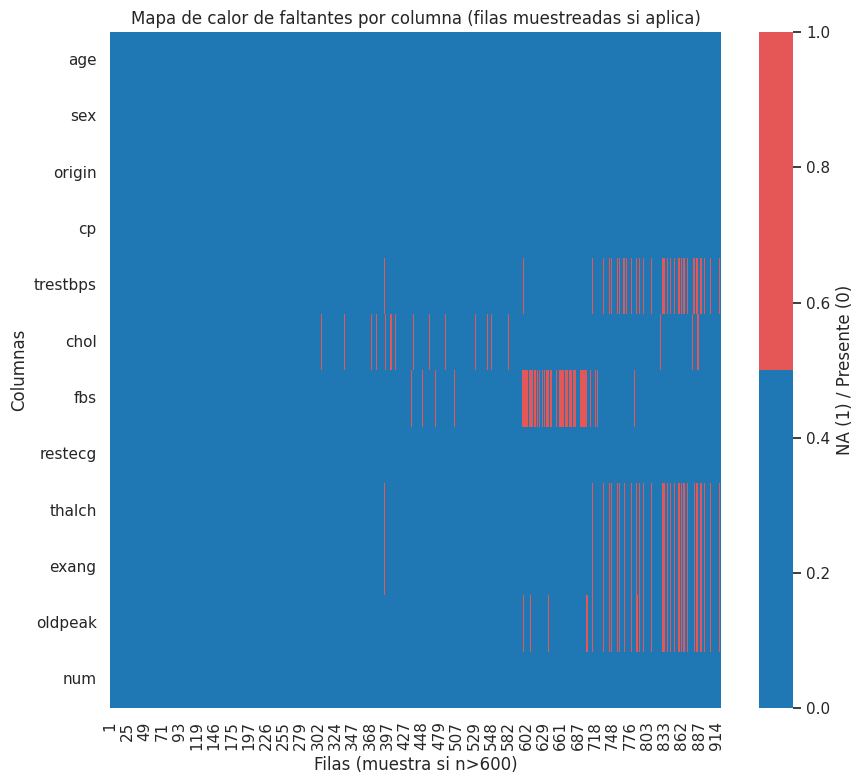


=== Pares con mayor co-ocurrencia de NA (Top 12) ===


/tmp/ipython-input-1789459862.py:58: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack(dropna=True)
/tmp/ipython-input-1789459862.py:62: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack(dropna=True)


co_NA
trestbps trestbps   True
exang    thalch     True
thalch   chol       True
         thalch     True
         exang      True
         oldpeak    True
exang    trestbps   True
         chol       True
         exang      True
fbs      oldpeak    True
exang    oldpeak    True
oldpeak  trestbps   True


=== Pares con mayor índice de Jaccard de NA (Top 12) ===


jaccard_NA
chol     chol           0.017
thalch   chol           0.012
chol     thalch         0.012
         exang          0.012
exang    chol           0.012
chol     trestbps       0.011
trestbps chol           0.011
oldpeak  chol           0.011
chol     oldpeak        0.011
thalch   thalch         0.009
         exang          0.009
exang    thalch         0.009

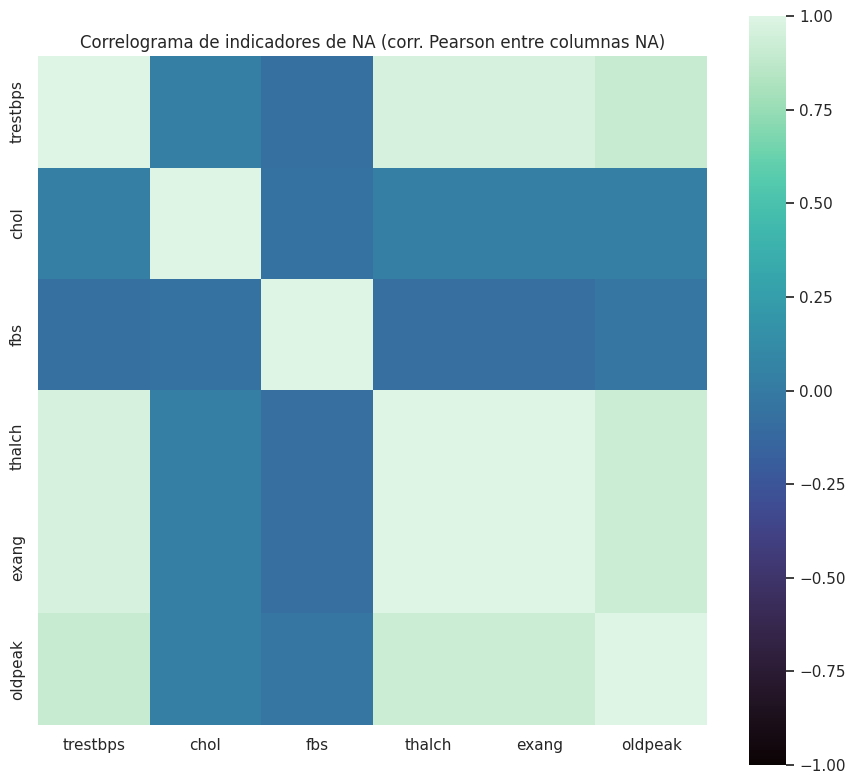


=== % faltantes por columna, desglosado por origin (primeras columnas con más NA) ===


/tmp/ipython-input-1789459862.py:79: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  na_by_origin = cardio_df_reduced.groupby('origin').apply(lambda g: g.isna().mean()*100)


,trestbps,chol,fbs,thalch,exang,oldpeak
origin,,,,,,
Cleveland,0.0,0.0,0.0,0.0,0.0,0.0
Hungary,0.3,7.9,2.7,0.3,0.3,0.0
Switzerland,1.6,0.0,60.7,0.8,0.8,4.9
VA Long Beach,28.0,3.5,3.5,26.5,26.5,28.0


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

try:
    cardio_df
except NameError:
    na_tokens = ['', ' ', 'NA', 'NaN', None]
    cardio_df = pd.read_csv('heart_disease.csv', na_values=na_tokens)
    cardio_df.columns = [c.strip().lower() for c in cardio_df.columns]
    if 'id' in cardio_df.columns:
        cardio_df = cardio_df.set_index('id')

na_pct = (cardio_df.isna().mean() * 100).sort_values(ascending=False)
print("=== Porcentaje de faltantes por columna (descendente) ===")
display(na_pct.to_frame('%_faltante').round(2))

threshold = 30.0
cols_to_drop = na_pct[na_pct > threshold].index.tolist()
print(f"\nColumnas a eliminar por >{threshold}% de faltantes ({len(cols_to_drop)}): {cols_to_drop}")

cardio_df_reduced = cardio_df.drop(columns=cols_to_drop)
print("\nShape antes:", cardio_df.shape, " | Shape después:", cardio_df_reduced.shape)

sns.set(style='whitegrid', context='notebook')

na_matrix = cardio_df_reduced.isna().astype(int)

max_rows_viz = 600
if len(na_matrix) > max_rows_viz:
    na_matrix_viz = na_matrix.sample(n=max_rows_viz, random_state=42).sort_index()
else:
    na_matrix_viz = na_matrix

plt.figure(figsize=(min(14, 0.25*na_matrix_viz.shape[1] + 6), 8))
sns.heatmap(na_matrix_viz.T, cmap=['#1f77b4', '#e45756'], cbar=True,
            cbar_kws={'label': 'NA (1) / Presente (0)'})
plt.title('Mapa de calor de faltantes por columna (filas muestreadas si aplica)')
plt.xlabel('Filas (muestra si n>600)')
plt.ylabel('Columnas')
plt.tight_layout()
plt.show()

na_bool = cardio_df_reduced.isna()
co_missing_counts = na_bool.T.dot(na_bool)
co_missing_counts.values[np.diag_indices_from(co_missing_counts)] = np.nan
na_counts = na_bool.sum(axis=0)
union_missing = (na_counts.values[:, None] + na_counts.values[None, :] - co_missing_counts.values)
with np.errstate(invalid='ignore', divide='ignore'):
    jaccard = co_missing_counts.values / union_missing
jaccard_df = pd.DataFrame(jaccard, index=co_missing_counts.index, columns=co_missing_counts.columns)

min_na_each = max(5, int(0.01 * len(cardio_df_reduced)))
valid_cols = na_counts[na_counts >= min_na_each].index.tolist()
co_counts_top = (co_missing_counts.loc[valid_cols, valid_cols]
                 .stack(dropna=True)
                 .sort_values(ascending=False))

jaccard_top = (jaccard_df.loc[valid_cols, valid_cols]
               .stack(dropna=True)
               .sort_values(ascending=False))

print("\n=== Pares con mayor co-ocurrencia de NA (Top 12) ===")
display(co_counts_top.head(12).to_frame('co_NA'))

print("\n=== Pares con mayor índice de Jaccard de NA (Top 12) ===")
display(jaccard_top.head(12).to_frame('jaccard_NA').round(3))

plt.figure(figsize=(min(14, 0.5*len(valid_cols) + 6), 8))
sns.heatmap(na_bool[valid_cols].corr(), cmap='mako', center=0, vmin=-1, vmax=1, square=True)
plt.title('Correlograma de indicadores de NA (corr. Pearson entre columnas NA)')
plt.tight_layout()
plt.show()

if 'origin' in cardio_df_reduced.columns:
    print("\n=== % faltantes por columna, desglosado por origin (primeras columnas con más NA) ===")
    na_by_origin = cardio_df_reduced.groupby('origin').apply(lambda g: g.isna().mean()*100)
    cols_with_na = na_by_origin.columns[(na_by_origin > 0).any(axis=0)]
    display(na_by_origin[cols_with_na].round(1).sort_index())

5. Si centramos el análisis en una de las variables identificadas en el ejercicio anterior, se puede suponer que los hallazgos obtenidos podrían ser aplicables a las demás variables que presentan un patrón similar.

* ¿Tendrán los valores faltantes de `thalch` relación con alguna otra variable? Analízalo considerando las siguientes columnas:
  *   Numéricas: `age`, `chol`
  *   Categóricas: `restecg`, `cp`

Para ello deberás dividir cada columna en dos grupos: con / sin faltantes en `thalch` y utilizar métodos gráficos y pruebas de hipótesis para ver si hay diferencias significativas.
* Incluye las conclusiones del análisis con los resultados obtenidos.
* Justifica si el mecanismo de faltantes de `thalch` es MCAR (*Missing Completely at Random*) o MAR (*Missing at Random*).

**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.

In [55]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()

    plt.figure(figsize=(10,4))

    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()

    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()

    p_value = ttest_ind(group_1_data,group_2_data).pvalue

    print('p-value of t-test: {}'.format(p_value))

In [56]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])
    p_value = chi2_contingency(contigency_table)[1]

    print('p-value of Chi_squared test: {}'.format(p_value))

Tasa de faltantes en thalach: 5.99%


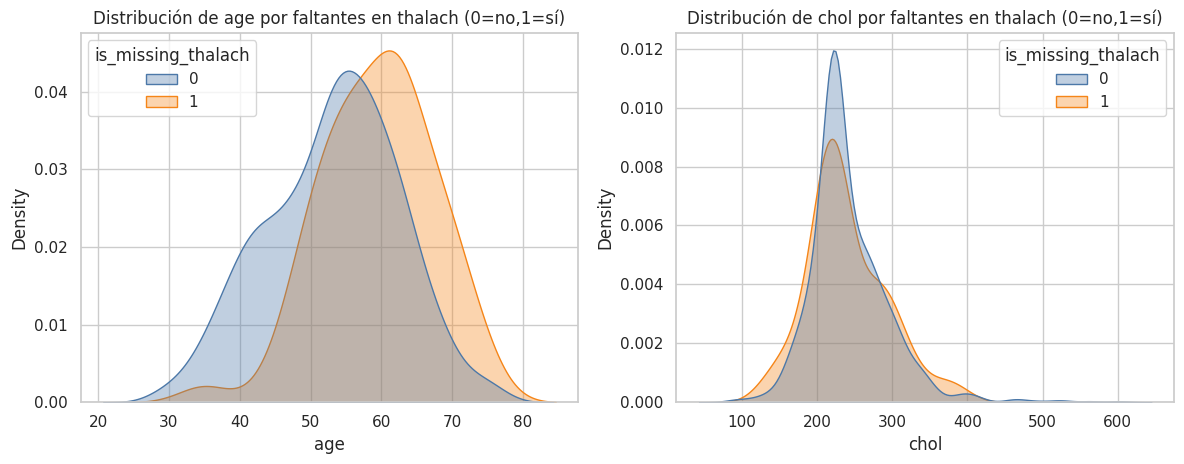

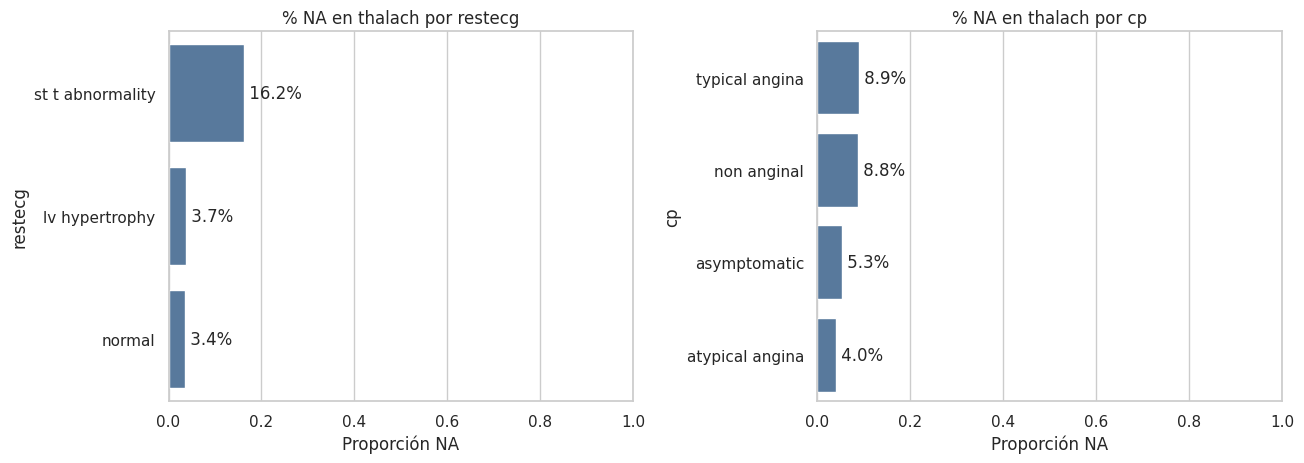


=== Numéricas: Welch t-test / Mann–Whitney + tamaños de efecto ===


,variable,n_present,n_missing,mean_present,mean_missing,median_present,median_missing,t_p,mw_p,cohens_d,cliffs_delta
0,age,863,55,53.155272,59.418182,54.0,60.0,4.115876e-07,0.000002,-0.673458,-0.383778
1,chol,836,52,242.351675,239.576923,224.0,223.0,7.104716e-01,0.599278,0.051912,0.043223



=== Categóricas: χ² + Cramér’s V ===


,variable,chi2_p,cramers_v,prop_missing_by_cat
0,restecg,1.147289e-09,0.211777,"{'st t abnormality': 0.16201117318435754, 'lv ..."
1,cp,1.542010e-01,0.075643,"{'typical angina': 0.08888888888888889, 'non a..."



=== Conclusión ===
Veredicto: MAR (Missing At Random)


In [57]:
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt
from scipy import stats
import math

sns.set(style='whitegrid', context='notebook')

na_tokens = ['', ' ', 'NA', 'NaN', None]
cardio_df = pd.read_csv('heart_disease.csv', na_values=na_tokens)
cardio_df.columns = [c.strip().lower() for c in cardio_df.columns]

if 'thalach' not in cardio_df.columns and 'thalch' in cardio_df.columns:
    cardio_df = cardio_df.rename(columns={'thalch':'thalach'})

for c in ['restecg','cp']:
    if c in cardio_df.columns:
        cardio_df[c] = (cardio_df[c].astype('string')
                         .str.strip().str.lower()
                         .str.replace('\\', '', regex=False)
                         .str.replace('_',' ', regex=False)
                         .str.replace('-',' ', regex=False)
                         .apply(lambda x: ' '.join(x.split()) if isinstance(x, str) else x))

assert 'thalach' in cardio_df.columns, "No se encontró 'thalach' (ni 'thalch')."
cardio_df['is_missing_thalach'] = cardio_df['thalach'].isna().astype(int)

print(f"Tasa de faltantes en thalach: {cardio_df['is_missing_thalach'].mean()*100:.2f}%")

num_vars = [v for v in ['age','chol'] if v in cardio_df.columns]
cat_vars = [v for v in ['restecg','cp'] if v in cardio_df.columns]

if num_vars:
    cols = 2; rows = math.ceil(len(num_vars)/cols)
    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 4.8*rows))
    axes = np.atleast_1d(axes).ravel()
    for i, col in enumerate(num_vars):
        ax = axes[i]
        sns.kdeplot(data=cardio_df, x=col, hue='is_missing_thalach', fill=True, common_norm=False,
                    palette={0:'#4C78A8',1:'#F58518'}, alpha=0.35, ax=ax)
        ax.set_title(f"Distribución de {col} por faltantes en thalach (0=no,1=sí)")
    for j in range(i+1, len(axes)): axes[j].axis('off')
    plt.tight_layout(); plt.show()

if cat_vars:
    cols = 2; rows = math.ceil(len(cat_vars)/cols)
    fig, axes = plt.subplots(rows, cols, figsize=(6.6*cols, 4.8*rows))
    axes = np.atleast_1d(axes).ravel()
    for i, col in enumerate(cat_vars):
        ax = axes[i]
        tab = cardio_df.groupby(col)['is_missing_thalach'].mean().sort_values(ascending=False)
        sns.barplot(x=tab.values, y=tab.index.astype(str), color='#4C78A8', ax=ax)
        ax.set_title(f"% NA en thalach por {col}"); ax.set_xlim(0,1); ax.set_xlabel("Proporción NA")
        for yi, (cat, val) in enumerate(tab.items()):
            ax.text(val, yi, f" {val*100:.1f}%", va='center', ha='left')
    for j in range(i+1, len(axes)): axes[j].axis('off')
    plt.tight_layout(); plt.show()

def cohens_d(a, b):
    a, b = pd.Series(a).dropna(), pd.Series(b).dropna()
    n1, n2 = len(a), len(b)
    if n1<2 or n2<2: return np.nan
    s1, s2 = a.var(ddof=1), b.var(ddof=1)
    sp = ((n1-1)*s1 + (n2-1)*s2) / (n1+n2-2)
    return (a.mean()-b.mean())/np.sqrt(sp) if sp>0 else np.nan

def cliffs_delta(a, b):
    a, b = pd.Series(a).dropna().values, pd.Series(b).dropna().values
    n1, n2 = len(a), len(b)
    if n1==0 or n2==0: return np.nan
    gt = sum((x>b).sum() for x in a)
    lt = sum((x<b).sum() for x in a)
    return (gt - lt) / (n1*n2)

num_rows = []
for col in num_vars:
    g_present = cardio_df.loc[cardio_df['is_missing_thalach']==0, col].dropna()
    g_missing = cardio_df.loc[cardio_df['is_missing_thalach']==1, col].dropna()
    if len(g_present)>=2 and len(g_missing)>=2:
        t_stat, t_p = stats.ttest_ind(g_present, g_missing, equal_var=False, nan_policy='omit')
        try:
            mw_stat, mw_p = stats.mannwhitneyu(g_present, g_missing, alternative='two-sided')
        except ValueError:
            mw_stat, mw_p = (np.nan, np.nan)
        d = cohens_d(g_present, g_missing)
        cd = cliffs_delta(g_present, g_missing)
        num_rows.append({
            'variable': col,
            'n_present': len(g_present),
            'n_missing': len(g_missing),
            'mean_present': g_present.mean(),
            'mean_missing': g_missing.mean(),
            'median_present': g_present.median(),
            'median_missing': g_missing.median(),
            't_p': t_p, 'mw_p': mw_p,
            'cohens_d': d, 'cliffs_delta': cd
        })
num_tests = pd.DataFrame(num_rows)
print("\n=== Numéricas: Welch t-test / Mann–Whitney + tamaños de efecto ===")
display(num_tests)

def cramers_v(tab):
    chi2, p, dof, exp = stats.chi2_contingency(tab, correction=False)
    n = tab.values.sum(); r, k = tab.shape
    return p, np.sqrt(chi2 / (n*(min(r,k)-1))) if min(r,k)>1 and n>0 else np.nan

cat_rows = []
for col in cat_vars:
    tab = pd.crosstab(cardio_df[col], cardio_df['is_missing_thalach'])
    if tab.shape[0] >= 2 and tab.shape[1] == 2:
        try:
            p, v = cramers_v(tab)
        except ValueError:
            p, v = (np.nan, np.nan)
        prop_missing = (tab[1]/tab.sum(axis=1)).sort_values(ascending=False).to_dict()
        cat_rows.append({'variable': col, 'chi2_p': p, 'cramers_v': v, 'prop_missing_by_cat': prop_missing})
cat_tests = pd.DataFrame(cat_rows)
print("\n=== Categóricas: χ² + Cramér’s V ===")
display(cat_tests)

alpha = 0.05
sig_num = False
if not num_tests.empty:
    for _, r in num_tests.iterrows():
        non_trivial = (abs(r['cohens_d'])>=0.2) or (abs(r['cliffs_delta'])>=0.147)
        if ((r['t_p']<alpha) or (r['mw_p']<alpha)) and non_trivial:
            sig_num = True; break

sig_cat = (cat_tests['chi2_p']<alpha).fillna(False).any() and (cat_tests['cramers_v']>=0.1).fillna(False).any()

verdict = "MAR (Missing At Random)" if (sig_num or sig_cat) else "Consistente con MCAR"
print("\n=== Conclusión ===")
print("Veredicto:", verdict)

6. La imputación de una variable con valores faltantes puede realizarse por grupos o segmentos relevantes. Esto significa que, en lugar de utilizar una estadística global de toda la columna, se calcula la estadística correspondiente dentro de cada grupo definido por otra variable, haciendo:

> `df['var_with_missing'] = df.groupby('related_var')['var_with_missing'].transform(lambda x: x.fillna(x.median()))`

* Utiliza la variable `restecg` para separar los grupos e imputar `thalch` y todas las variables con patrón de faltantes similar (identificadas en el ejercicio 3) Asegúrate de cambiar la función de agregado si hay variables no numéricas.
* Vuelve a generar el mapa de calor para verificar que los valores faltantes en estas variables hayan sido imputados.

== Variables candidatas con patrón de NA similar a 'thalach' ==
['trestbps', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

% de NA antes de imputar (solo variables a imputar):
ca          66.34
thal        52.72
slope       33.55
oldpeak      6.75
trestbps     6.43
exang        5.99
thalach      5.99
dtype: float64

% de NA después de imputar (solo variables imputadas):
thalach     0.0
trestbps    0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
dtype: float64


/tmp/ipython-input-1375003406.py:99: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.fillna(mode_vals.iloc[0])


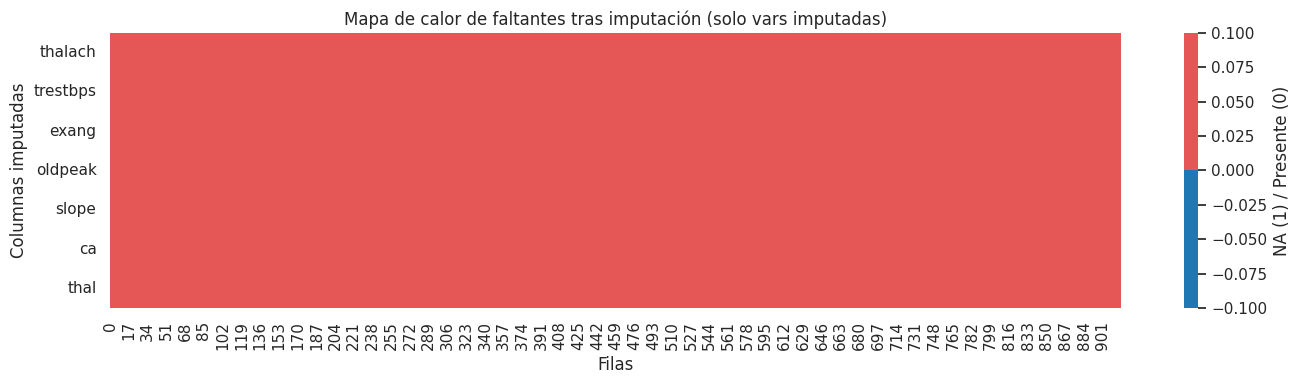

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', context='notebook')

try:
    cardio_df
except NameError:
    na_tokens = ['', ' ', 'NA', 'NaN', None]
    cardio_df = pd.read_csv('heart_disease.csv', na_values=na_tokens)

cardio_df.columns = [c.strip().lower() for c in cardio_df.columns]

if 'thalach' not in cardio_df.columns and 'thalch' in cardio_df.columns:
    cardio_df = cardio_df.rename(columns={'thalch':'thalach'})

assert 'thalach' in cardio_df.columns, "No se encontró la columna 'thalach' (ni 'thalch')."

if 'restecg' in cardio_df.columns:
    cardio_df['restecg'] = (cardio_df['restecg']
                            .astype('string')
                            .str.strip().str.lower()
                            .str.replace('\\','', regex=False)
                            .str.replace('_',' ', regex=False)
                            .str.replace('-',' ', regex=False)
                            .apply(lambda x: ' '.join(x.split()) if isinstance(x,str) else x))
else:
    raise AssertionError("No se encontró la columna 'restecg' para agrupar.")

cardio_df['restecg_group'] = cardio_df['restecg'].fillna('unknown')

na_bool = cardio_df.isna()
base = 'thalach'
na_thalach = na_bool[base].astype(int)

co_counts = {}
jaccard_scores = {}

na_counts = na_bool.sum(axis=0)

for col in cardio_df.columns:
    if col == base:
        continue
    # co-NA
    co = int((na_bool[col] & na_bool[base]).sum())
    # unión (NA en A o en base)
    union = int(na_counts[col] + na_counts[base] - co)
    jacc = (co / union) if union > 0 else 0.0
    co_counts[col] = co
    jaccard_scores[col] = jacc

co_s = pd.Series(co_counts, name='co_na_with_thalach').sort_values(ascending=False)
jac_s = pd.Series(jaccard_scores, name='jaccard_na_with_thalach').sort_values(ascending=False)

min_na = max(5, int(0.05 * len(cardio_df)))
na_thalach_count = int(na_counts[base])

candidates = []
for col in cardio_df.columns:
    if col == base:
        continue
    if na_counts[col] >= min_na:
        if (jaccard_scores[col] >= 0.20) or (co_counts[col] >= 0.20 * na_thalach_count):
            candidates.append(col)

drop_from_candidates = {'num', 'num_bin'}
candidates = [c for c in candidates if c not in drop_from_candidates]

print("== Variables candidatas con patrón de NA similar a 'thalach' ==")
print(candidates if candidates else "(Ninguna detectada con los umbrales actuales)")

vars_to_impute = [base] + candidates

before_na_pct = cardio_df[vars_to_impute].isna().mean().sort_values(ascending=False) * 100
print("\n% de NA antes de imputar (solo variables a imputar):")
print(before_na_pct.round(2))

num_mask = cardio_df[vars_to_impute].select_dtypes(include=['number']).columns
cat_mask = cardio_df[vars_to_impute].select_dtypes(include=['object','string','category']).columns

for col in num_mask:

    cardio_df[col] = (cardio_df
                      .groupby('restecg_group')[col]
                      .transform(lambda x: x.fillna(x.median())))

    if cardio_df[col].isna().any():
        global_med = cardio_df[col].median()
        cardio_df[col] = cardio_df[col].fillna(global_med)

def fill_mode(series: pd.Series):
    if series.dropna().empty:
        return series
    mode_vals = series.mode(dropna=True)
    if mode_vals.empty:
        return series
    return series.fillna(mode_vals.iloc[0])

for col in cat_mask:
    cardio_df[col] = cardio_df.groupby('restecg_group')[col].transform(fill_mode)

    if cardio_df[col].isna().any():
        global_mode = cardio_df[col].mode(dropna=True)
        if not global_mode.empty:
            cardio_df[col] = cardio_df[col].fillna(global_mode.iloc[0])

after_na_pct = cardio_df[vars_to_impute].isna().mean().sort_values(ascending=False) * 100
print("\n% de NA después de imputar (solo variables imputadas):")
print(after_na_pct.round(2))

plt.figure(figsize=(min(14, 1.2*len(vars_to_impute)+6), 4))
sns.heatmap(cardio_df[vars_to_impute].isna().astype(int).T,
            cmap=['#1f77b4', '#e45756'], cbar=True,
            cbar_kws={'label': 'NA (1) / Presente (0)'})
plt.title("Mapa de calor de faltantes tras imputación (solo vars imputadas)")
plt.xlabel("Filas"); plt.ylabel("Columnas imputadas")
plt.tight_layout(); plt.show()



7. Para las variables que aún presentan valores faltantes, realiza la imputación utilizando estadísticas generales calculadas sobre toda la columna, sin segmentar por grupos. Esta vez utiliza la clase `SimpleImputer` de sklearn
* Justifica la estrategia (*mean, median, most_frequent*) que emplees en cada caso.


Columnas con NA a imputar: ['chol', 'fbs']

% de NA antes (solo columnas imputadas):
fbs     9.69
chol    3.27
dtype: float64

% de NA después (solo columnas imputadas):
chol    0.0
fbs     0.0
dtype: float64

=== Estrategia y justificación por columna imputada ===


/tmp/ipython-input-783468248.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[233.0 286.0 229.0 250.0 204.0 236.0 268.0 354.0 254.0 203.0 192.0 294.0
 256.0 263.0 199.0 168.0 229.0 239.0 275.0 266.0 211.0 283.0 284.0 224.0
 206.0 219.0 340.0 226.0 247.0 167.0 239.0 230.0 335.0 234.0 233.0 226.0
 177.0 276.0 353.0 243.0 225.0 199.0 302.0 212.0 330.0 230.0 175.0 243.0
 417.0 197.0 198.0 177.0 290.0 219.0 253.0 266.0 233.0 172.0 273.0 213.0
 305.0 177.0 216.0 304.0 188.0 282.0 185.0 232.0 326.0 231.0 269.0 254.0
 267.0 248.0 197.0 360.0 258.0 308.0 245.0 270.0 208.0 264.0 321.0 274.0
 325.0 235.0 257.0 216.0 234.0 256.0 302.0 164.0 231.0 141.0 252.0 255.0
 239.0 258.0 201.0 222.0 260.0 182.0 303.0 265.0 188.0 309.0 177.0 229.0
 260.0 219.0 307.0 249.0 186.0 341.0 263.0 203.0 211.0 183.0 330.0 254.0
 256.0 407.0 222.0 217.0 282.0 234.0 288.0 239.0 220.0 209.0 258.0 227.0
 204.0 261.0 213.0 250.0 174.0 281.0 198.0

,columna,tipo,estrategia,justificación
0,chol,numérica,median,|skew|=1.64 (>0.5) o outliers=4.2% (>2%)
1,fbs,categórica,most_frequent,modo conserva categorías y evita creación de n...


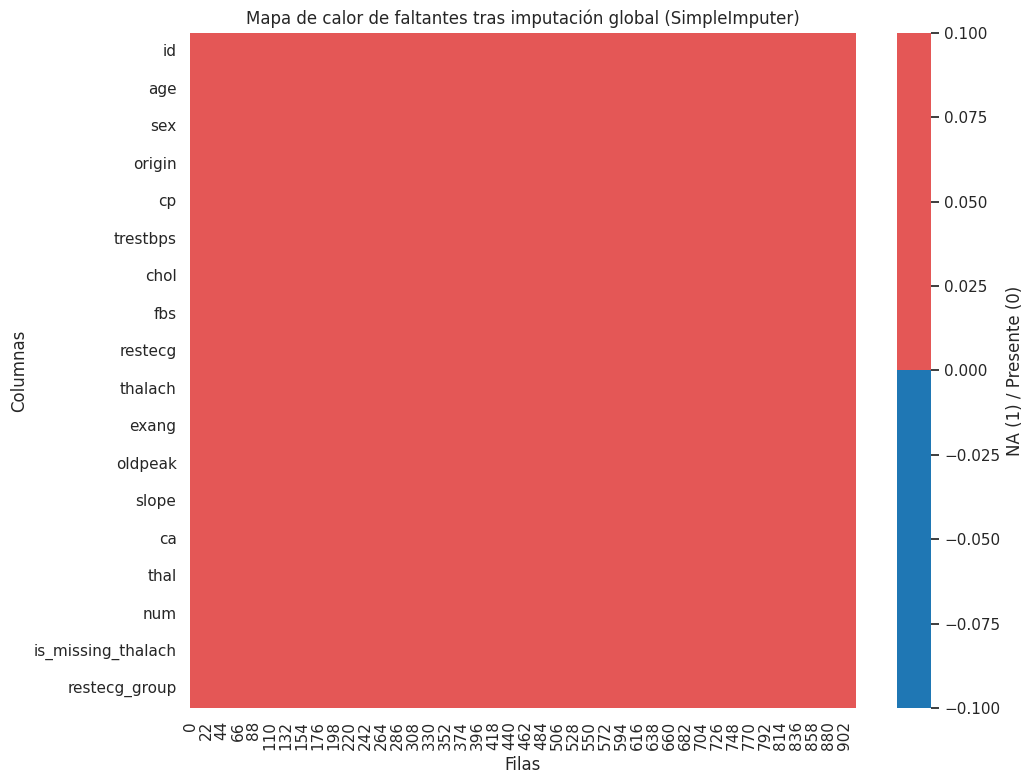

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

try:
    cardio_df
except NameError:
    na_tokens = ['', ' ', 'NA', 'NaN', None]
    cardio_df = pd.read_csv('heart_disease.csv', na_values=na_tokens)
    cardio_df.columns = [c.strip().lower() for c in cardio_df.columns]

    if 'thalach' not in cardio_df.columns and 'thalch' in cardio_df.columns:
        cardio_df = cardio_df.rename(columns={'thalch':'thalach'})

    for c in ['restecg','cp','slope','thal','sex','origin']:
        if c in cardio_df.columns:
            cardio_df[c] = (cardio_df[c].astype('string')
                            .str.strip().str.lower()
                            .str.replace('\\','', regex=False)
                            .str.replace('_',' ', regex=False)
                            .str.replace('-',' ', regex=False)
                            .apply(lambda x: ' '.join(x.split()) if isinstance(x,str) else x))

cols_excluir = {'id', 'num', 'num_bin'} & set(cardio_df.columns)
na_cols = cardio_df.columns[cardio_df.isna().any()].difference(cols_excluir).tolist()

if not na_cols:
    print("No hay columnas con valores faltantes que requieran imputación global.")
else:
    print("Columnas con NA a imputar:", na_cols)

    num_na_cols = [c for c in na_cols if pd.api.types.is_numeric_dtype(cardio_df[c])]
    cat_na_cols = [c for c in na_cols if cardio_df[c].dtype.name in ['object','string','category']]

    def outlier_ratio_iqr(s, k=1.5):
        s = pd.Series(s).dropna()
        if s.empty: return 0.0
        q1, q3 = s.quantile([0.25, 0.75])
        iqr = q3 - q1
        lo, hi = q1 - k*iqr, q3 + k*iqr
        return float(((s < lo) | (s > hi)).mean())

    skewness = {}
    outlier_ratio = {}
    for c in num_na_cols:
        s = cardio_df[c]
        skewness[c] = float(s.skew(skipna=True))
        outlier_ratio[c] = outlier_ratio_iqr(s)

    num_median_cols = []
    num_mean_cols = []
    reasons = []

    for c in num_na_cols:
        sk = abs(skewness[c])
        orat = outlier_ratio[c]
        if (sk > 0.5) or (orat > 0.02):
            num_median_cols.append(c)
            reasons.append({
                'columna': c,
                'tipo': 'numérica',
                'estrategia': 'median',
                'justificación': f'|skew|={sk:.2f} (>0.5) o outliers={orat*100:.1f}% (>2%)'
            })
        else:
            num_mean_cols.append(c)
            reasons.append({
                'columna': c,
                'tipo': 'numérica',
                'estrategia': 'mean',
                'justificación': f'|skew|={sk:.2f} y outliers={orat*100:.1f}% bajos'
            })

    for c in cat_na_cols:
        reasons.append({
            'columna': c,
            'tipo': 'categórica',
            'estrategia': 'most_frequent',
            'justificación': 'modo conserva categorías y evita creación de niveles artificiales'
        })

    transformers = []
    if num_mean_cols:
        transformers.append(('num_mean', SimpleImputer(strategy='mean'), num_mean_cols))
    if num_median_cols:
        transformers.append(('num_median', SimpleImputer(strategy='median'), num_median_cols))
    if cat_na_cols:
        transformers.append(('cat_mf', SimpleImputer(strategy='most_frequent'), cat_na_cols))

    ct = ColumnTransformer(transformers=transformers, remainder='drop', verbose_feature_names_out=False)

    X = cardio_df[na_cols]
    X_imp = ct.fit_transform(X)

    imputed_cols_order = ct.get_feature_names_out()
    X_imp_df = pd.DataFrame(X_imp, columns=imputed_cols_order, index=cardio_df.index)

    cardio_df.loc[:, imputed_cols_order] = X_imp_df

    before = X.isna().mean().sort_values(ascending=False)*100
    after = cardio_df[imputed_cols_order].isna().mean().sort_values(ascending=False)*100

    print("\n% de NA antes (solo columnas imputadas):")
    print(before.round(2))
    print("\n% de NA después (solo columnas imputadas):")
    print(after.round(2))

    reasons_df = (pd.DataFrame(reasons)
                    .set_index('columna')
                    .loc[imputed_cols_order]
                    .reset_index())
    print("\n=== Estrategia y justificación por columna imputada ===")
    try:
        from IPython.display import display
        display(reasons_df)
    except:
        print(reasons_df)

    plt.figure(figsize=(min(14, 0.25*cardio_df.shape[1] + 6), 8))
    sns.heatmap(cardio_df.isna().astype(int).T,
                cmap=['#1f77b4', '#e45756'], cbar=True,
                cbar_kws={'label': 'NA (1) / Presente (0)'})
    plt.title("Mapa de calor de faltantes tras imputación global (SimpleImputer)")
    plt.xlabel("Filas"); plt.ylabel("Columnas")
    plt.tight_layout(); plt.show()

8. Dibuja boxplots de todas las variables numéricas.
* Obtén los valores atípicos mediante el método gráfico, a partir del objeto devuelto por el boxplot.

/tmp/ipython-input-3889667608.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = ax.boxplot(


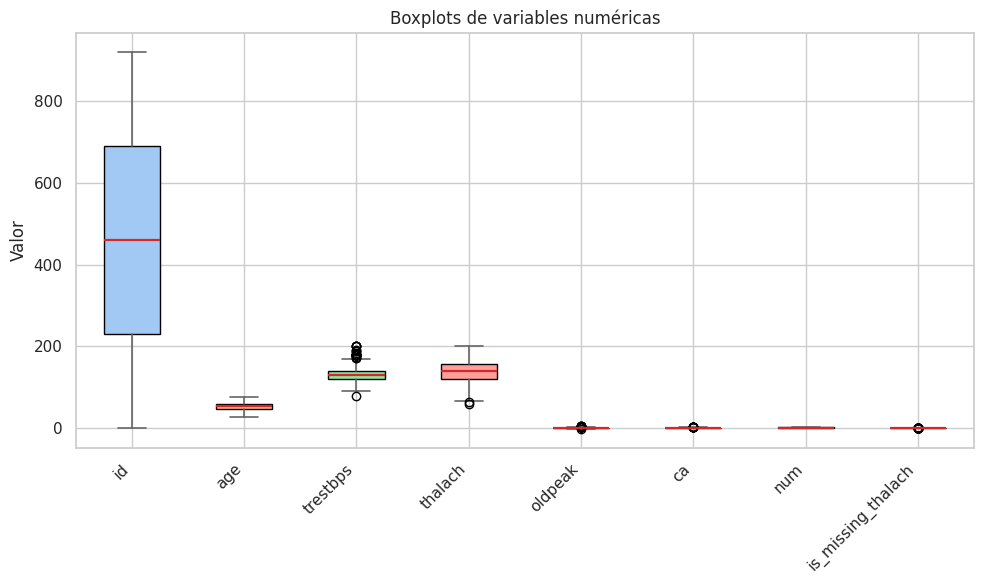

=== Resumen de outliers (por variable) desde el objeto gráfico ===
- id: 0 outliers
- age: 0 outliers
- trestbps: 27 outliers | rango: [80, 200]
- thalach: 2 outliers | rango: [60, 63]
- oldpeak: 16 outliers | rango: [-2.6, 6.2]
- ca: 20 outliers | rango: [3, 3]
- num: 0 outliers
- is_missing_thalach: 55 outliers | rango: [1, 1]

=== Tabla de outliers (desde objeto de boxplot) ===


,variable,valor_outlier,conteo_puntos_en_plot,filas_con_ese_valor
0,ca,3.0,20,"[1, 40, 62, 91, 92, 104, 118, 121, 146, 155, 1..."
1,is_missing_thalach,1.0,55,"[393, 712, 731, 741, 744, 747, 748, 754, 756, ..."
2,oldpeak,-2.6,1,[613]
3,oldpeak,3.8,1,[211]
4,oldpeak,4.0,8,"[121, 126, 293, 567, 802, 823, 839, 861]"
5,oldpeak,4.2,2,"[183, 191]"
6,oldpeak,4.4,1,[285]
7,oldpeak,5.0,1,[588]
8,oldpeak,5.6,1,[123]
9,oldpeak,6.2,1,[91]


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set(style='whitegrid', context='notebook')

try:
    cardio_df
except NameError:
    na_tokens = ['', ' ', 'NA', 'NaN', None]
    cardio_df = pd.read_csv('heart_disease.csv', na_values=na_tokens)
    cardio_df.columns = [c.strip().lower() for c in cardio_df.columns]
    if 'id' in cardio_df.columns:
        cardio_df = cardio_df.set_index('id')

    if 'thalach' not in cardio_df.columns and 'thalch' in cardio_df.columns:
        cardio_df = cardio_df.rename(columns={'thalch':'thalach'})

num_cols = cardio_df.select_dtypes(include=['number']).columns.tolist()


assert len(num_cols) > 0, "No se detectaron columnas numéricas en cardio_df."

data_arrays = [cardio_df[c].dropna().values for c in num_cols]

fig, ax = plt.subplots(figsize=(max(10, 0.8*len(num_cols)), 6))
bplot = ax.boxplot(
    data_arrays,
    labels=num_cols,
    vert=True,
    patch_artist=True,
    whis=1.5,
    showfliers=True
)

colors = sns.color_palette('pastel', n_colors=len(num_cols))
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
for whisker in bplot['whiskers']:
    whisker.set(color='#666', linewidth=1.2)
for cap in bplot['caps']:
    cap.set(color='#666', linewidth=1.2)
for median in bplot['medians']:
    median.set(color='#d62728', linewidth=1.6)

ax.set_title('Boxplots de variables numéricas')
ax.set_ylabel('Valor')
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')

plt.tight_layout()
plt.show()

outliers_dict = {}

for idx, flier in enumerate(bplot['fliers']):
    var = num_cols[idx]
    yvals = np.array(flier.get_ydata())
    outliers_dict[var] = yvals

print("=== Resumen de outliers (por variable) desde el objeto gráfico ===")
for var, yvals in outliers_dict.items():
    print(f"- {var}: {len(yvals)} outliers" + ("" if len(yvals)==0 else f" | rango: [{np.min(yvals):.3g}, {np.max(yvals):.3g}]"))

rows = []
for var, yvals in outliers_dict.items():
    if len(yvals) == 0:
        continue

    unique_vals, counts = np.unique(yvals, return_counts=True)
    for val, cnt in zip(unique_vals, counts):

        idxs = cardio_df.index[cardio_df[var] == val].tolist()
        rows.append({
            'variable': var,
            'valor_outlier': float(val),
            'conteo_puntos_en_plot': int(cnt),
            'filas_con_ese_valor': idxs
        })

outliers_df = pd.DataFrame(rows).sort_values(['variable','valor_outlier']).reset_index(drop=True)

print("\n=== Tabla de outliers (desde objeto de boxplot) ===")
display(outliers_df if not outliers_df.empty else pd.DataFrame({'mensaje':['No se detectaron outliers por la regla gráfica (1.5 IQR).']}))



tukey_idx = {c: tukey_outlier_indices(cardio_df[c]) for c in num_cols}


9. Para la variable `trestbps`, calcula los valores atípicos utilizando el método del rango intercuartílico (IQR).
* Para ello obtén los cuartiles necesarios y determina los límites superior e inferior para filtrar los valores que se encuentren fuera de ese rango.
* Verifica si los resultados coinciden con los obtenidos en el ejercicio anterior.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    cardio_df
except NameError:
    na_tokens = ['', ' ', 'NA', 'NaN', None]
    cardio_df = pd.read_csv('heart_disease.csv', na_values=na_tokens)
    cardio_df.columns = [c.strip().lower() for c in cardio_df.columns]
    if 'id' in cardio_df.columns:
        cardio_df = cardio_df.set_index('id')

    if 'thalach' not in cardio_df.columns and 'thalch' in cardio_df.columns:
        cardio_df = cardio_df.rename(columns={'thalch':'thalach'})

col = 'trestbps'
assert col in cardio_df.columns, f"No se encontró la columna '{col}'."

df_for_outliers = cardio_df.copy()
if 'num_mean_cols' in globals() and 'num_median_cols' in globals() and 'cat_na_cols' in globals():
    imputed_cols_order = []
    if 'num_mean_cols' in globals():
        imputed_cols_order.extend(num_mean_cols)
    if 'num_median_cols' in globals():
        imputed_cols_order.extend(num_median_cols)
    if 'cat_na_cols' in globals():
        imputed_cols_order.extend(cat_na_cols)


    if 'imputed_cols_order' in globals() and 'X_imp_df' in globals():

        pass

s = df_for_outliers[col].dropna().astype(float)

Q1 = s.quantile(0.25)
Q3 = s.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

iqr_mask = (df_for_outliers[col] < lower) | (df_for_outliers[col] > upper)
iqr_outlier_idx = df_for_outliers.index[iqr_mask & df_for_outliers[col].notna()]
iqr_outlier_vals = df_for_outliers.loc[iqr_outlier_idx, col].astype(float).tolist()

print("=== trestbps: IQR ===")
print(f"Q1={Q1:.3f} | Q3={Q3:.3f} | IQR={IQR:.3f}")
print(f"Límite inferior={lower:.3f} | Límite superior={upper:.3f}")
print(f"Total outliers (IQR): {len(iqr_outlier_idx)}")

iqr_table = (df_for_outliers.loc[iqr_outlier_idx, [col]]
             .rename(columns={col:'valor_outlier'})
             .assign(variable=col)
             .assign(id=iqr_outlier_idx)
             .reset_index(drop=True)
             .loc[:, ['id','variable','valor_outlier']])

print("\n=== Outliers por IQR (primeros 20) ===")
display(iqr_table.head(20))

box_vals = None

if 'outliers_df' in globals() and isinstance(outliers_df, pd.DataFrame) and 'variable' in outliers_df.columns and 'valor_outlier' in outliers_df.columns:
    use_existing = True
else:
    use_existing = False

if use_existing:
    box_vals = outliers_df.loc[outliers_df['variable'] == col, 'valor_outlier'].astype(float).tolist()
else:

    fig, ax = plt.subplots(figsize=(5, 4))
    bplot = ax.boxplot(
        [s.values], labels=[col],
        vert=True, patch_artist=True, whis=1.5, showfliers=True
    )
    ax.set_title("Boxplot trestbps (para extraer outliers gráficos)")
    plt.tight_layout(); plt.show()

    if bplot['fliers']:
        box_vals = bplot['fliers'][0].get_ydata().tolist()
    else:
        box_vals = []


print(f"\nTotal outliers (método gráfico): {len(box_vals)}")

def multiset_equal(a, b, tol=1e-9):

    aa = pd.Series(a).round(9).sort_values().tolist()
    bb = pd.Series(b).round(9).sort_values().tolist()
    return aa == bb, aa, bb

ok, iqr_vals_sorted, box_vals_sorted = multiset_equal(iqr_outlier_vals, box_vals)

print("\n=== ¿Coinciden IQR vs método gráfico? ===")
print("Resultado:", "SÍ, coinciden." if ok else "NO, existen diferencias.")

if not ok:

    iqr_counts = pd.Series(iqr_vals_sorted).value_counts()
    box_counts = pd.Series(box_vals_sorted).value_counts()
    comp = pd.concat([iqr_counts.rename('IQR'), box_counts.rename('Boxplot')], axis=1).fillna(0).astype(int)
    comp['diff'] = comp['IQR'] - comp['Boxplot']
    print("\nDiferencias en frecuencias por valor (IQR - Boxplot):")
    display(comp[comp['diff'] != 0].sort_index())

=== trestbps: IQR ===
Q1=120.000 | Q3=140.000 | IQR=20.000
Límite inferior=90.000 | Límite superior=170.000
Total outliers (IQR): 27

=== Outliers por IQR (primeros 20) ===


,id,variable,valor_outlier
0,14,trestbps,172.0
1,83,trestbps,180.0
2,126,trestbps,200.0
3,172,trestbps,174.0
4,183,trestbps,178.0
5,188,trestbps,192.0
6,201,trestbps,180.0
7,213,trestbps,178.0
8,231,trestbps,180.0
9,338,trestbps,190.0



Total outliers (método gráfico): 9

=== ¿Coinciden IQR vs método gráfico? ===
Resultado: NO, existen diferencias.

Diferencias en frecuencias por valor (IQR - Boxplot):


,IQR,Boxplot,diff
172.0,2,1,1
178.0,3,1,2
180.0,12,1,11
190.0,2,1,1
200.0,4,1,3


10. Elimina los valores atípicos identificados de la variable `trestbps`.
* Dibuja el boxplot final para visualizar la distribución depurada.

=== trestbps: IQR ===
Q1 = 120.000 | Q3 = 140.000 | IQR = 20.000
Límite inferior = 90.000 | Límite superior = 170.000
Observaciones válidas (antes): 918 | Outliers detectados: 27
Observaciones válidas (después): 891 (eliminadas 27)


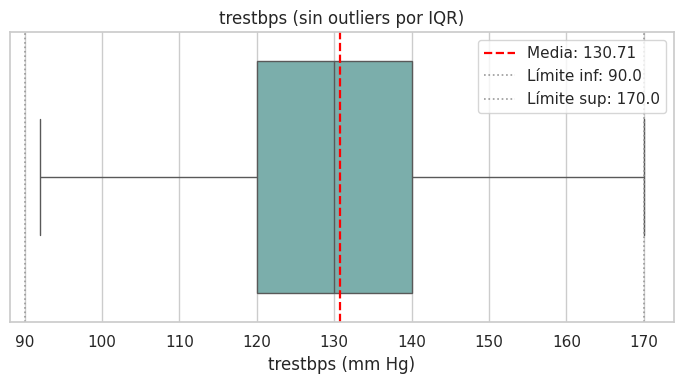

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', context='notebook')

try:
    cardio_df
except NameError:
    na_tokens = ['', ' ', 'NA', 'NaN', None]
    cardio_df = pd.read_csv('heart_disease.csv', na_values=na_tokens)
    cardio_df.columns = [c.strip().lower() for c in cardio_df.columns]
    if 'id' in cardio_df.columns:
        cardio_df = cardio_df.set_index('id')
    if 'thalach' not in cardio_df.columns and 'thalch' in cardio_df.columns:
        cardio_df = cardio_df.rename(columns={'thalch':'thalach'})

col = 'trestbps'
assert col in cardio_df.columns, f"No se encontró la columna '{col}'."

s = cardio_df[col].dropna().astype(float)
Q1 = s.quantile(0.25)
Q3 = s.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

out_mask = (cardio_df[col] < lower) | (cardio_df[col] > upper)

n_total = cardio_df[col].notna().sum()
n_out = int(out_mask.sum())
print("=== trestbps: IQR ===")
print(f"Q1 = {Q1:.3f} | Q3 = {Q3:.3f} | IQR = {IQR:.3f}")
print(f"Límite inferior = {lower:.3f} | Límite superior = {upper:.3f}")
print(f"Observaciones válidas (antes): {n_total} | Outliers detectados: {n_out}")

cardio_df_no_out_trestbps = cardio_df.loc[~out_mask].copy()

n_rest = cardio_df_no_out_trestbps[col].notna().sum()
print(f"Observaciones válidas (después): {n_rest} (eliminadas {n_out})")

plt.figure(figsize=(7, 4))
sns.boxplot(x=cardio_df_no_out_trestbps[col], color='#72B7B2')

mean_v = cardio_df_no_out_trestbps[col].mean()
plt.axvline(mean_v, color='red', linestyle='--', lw=1.6, label=f'Media: {mean_v:.2f}')

plt.axvline(lower, color='#999', linestyle=':', lw=1.2, label=f'Límite inf: {lower:.1f}')
plt.axvline(upper, color='#999', linestyle=':', lw=1.2, label=f'Límite sup: {upper:.1f}')
plt.title('trestbps (sin outliers por IQR)')
plt.xlabel('trestbps (mm Hg)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()